# Limpieza de datos

Vamos a aplicar el [checklist del Banco Mundial](https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning) en Python usando el [SciPy stack](https://www.scipy.org/stackspec.html), principalmente pandas

## 0. Prerequisitos

Aclaración: La próxima celda es para compatilibidad con Colab, NO ES RECOMENDADO realizar pip install desde un notebook.

In [1]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."
if 'ftfy' not in sys.modules:
    !pip install 'ftfy<5.6'

    100% |████████████████████████████████| 51kB 191kB/s ta 0:00:011


# 1. Importando los datos

# 1.1. Verificar que no hay problemas en la importación

In [2]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

Veamos de importar datos de proyectos de Kickstarter la plataforma de Crowdsourcing

In [3]:
kickstarter_2016 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201612.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 11: invalid start byte

Por defecto Pandas falla si hay errores para leer datos https://pandas.pydata.org/pandas-docs/stable/io.html#error-handling

Por ahora cambiamos a un archivo más actualizado, volveremos a este error más adelante

In [4]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv")

Veamos los datos cargados en el dataframe

In [5]:
kickstarter_2018

ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
5       1000014025                               Monarch Espresso Bar   
6       1000023410  Support Solar Roasted Coffee & Green Energy!  ...   
7       1000030581  Chaser Strips. Our Strips make Shots their B*tch!   
8       1000034518  SPIN - Premium Retractable In-Ear Headphones w...   
9        100004195  STUDIO IN THE SKY - A Documentary Feature Film...   
10       100004721                                Of Jesus and Madmen   
11       100005484                                   Lisa Lim New CD!   
12      1000055792                                 The Cottage Market   
13      1000056157  G-Spot Place for Gamers to connect with eachot...   
14      1000057089  Tombstone: Old West tabletop game and miniatur...   
15      1000064368                                     Survival Rings   
16      1000064918                                          The Beard   
17      1000068480                   Notes From London: Above & Below   
18      1000070642                Mike Corey's Darkness & Light Album   
19      1000071625                                           Boco Tea   
20      1000072011              CMUK. Shoes: Take on Life Feet First.   
21      1000081649                   MikeyJ clothing brand fundraiser   
22      1000082254                     Alice in Wonderland in G Minor   
23      1000087442  Mountain brew: A quest for alcohol sustainability   
24      1000091520                        The Book Zoo - A Mini-Comic   
25      1000102741  Matt Cavenaugh & Jenny Powers make their 1st a...   
26      1000103948                               Superhero Teddy Bear   
27      1000104688                                Permaculture Skills   
28      1000104953  Rebel Army Origins: The Heroic Story Of Major ...   
29       100011318                      My Moon - Animated Short Film   
...            ...                                                ...   
378631   999832803  MONSTROCARDS- A Creative Drawing Game of Horri...   
378632    99984851                                           "Loreto"   
378633   999865831  STATE OF G - Men's Blazer Jacket & Women's Car...   
378634   999867839                                      Transcaucasia   
378635    99987261  You're Not Cis, You Just Think You Are: My Enb...   
378636   999877902                      Little Saturday's Debut Album   
378637   999878813                           Ways to Look at the Moon   
378638   999880710                                Terminal Uniqueness   
378639   999884445  Superette Tea - Boldly Caffeinated Loose Leaf Tea   
378640   999893629                          Ciridian Helix (Canceled)   
378641    99991751   Here is the oasis for the youngest in the world.   
378642   999929142  ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...   
378643   999931480                     Google Glass Shield (Canceled)   
378644   999934908                               The Manual Bar Blade   
378645   999941823        The Chronicles of Erinoth - A Graphic Novel   
378646   999943841                                The Dog Coffee Book   
378647   999950812                              The Cease is Increase   
378648   999955533        Cards and Chit Network Season 2! (Canceled)   
378649   999963618      Colorado International Activism Film Festival   
378650    99996661                         Date Seat - Boston iOS App   
378651   999969812                                       AT THE BEACH   
378652   999971898                        Beach Wrestling Documentary   
378653   999972264                                            Islanda   
3

Por defecto solo vemos los valores al comienzo o al final del archivo.

Tomemos una muestra al azar para ver valores más dispersos

In [6]:
# set seed for reproducibility
import numpy as np
np.random.seed(0)

In [7]:
kickstarter_2018.sample(5)

ID                                               name  \
338862   796196901                                 10G Christmas Tree   
277871   483825010                                              Gliff   
47000    123916947                                 STUFFED Food Truck   
111338  1565733636  NeoExodus Adventure: Origin of Man for Pathfin...   
53743   1273544891        NAPOLEON IN NEW YORK! an original TV Series   

               category main_category currency    deadline     goal  \
338862              Art           Art      USD  2010-12-26 10526.00   
277871  Gaming Hardware         Games      USD  2016-03-28 10000.00   
47000       Food Trucks          Food      USD  2015-01-06 60000.00   
111338   Tabletop Games         Games      USD  2012-05-01   500.00   
53743            Comedy  Film & Video      USD  2016-07-26 25000.00   

                   launched  pledged       state  backers country  \
338862  2010-12-08 08:44:04     0.00      failed        0      US   
277871  2016-01-28 04:56:18    51.00      failed        5      US   
47000   2014-11-07 02:24:36    25.00      failed        1      US   
111338  2012-03-15 01:16:10   585.00  successful       17      US   
53743   2016-05-27 00:07:25    25.00      failed        1      US   

        usd pledged  usd_pledged_real  usd_goal_real  
338862         0.00              0.00       10526.00  
277871        51.00             51.00       10000.00  
47000         25.00             25.00       60000.00  
111338       585.00            585.00         500.00  
53743         25.00             25.00       25000.00

No se observa a simple vista ningún problema obvio.

Notar que todos vimos los mismos resultados. Al fijar la semilla no hubo tal azar, esto es algo necesario cuando queremos "reproducir valores aleatorios"

Veamos la descripción del dataset si se corresponde con lo levantado https://www.kaggle.com/kemical/kickstarter-projects/data

In [8]:
pd.DataFrame([["ID", "No description provided", "Numeric"],
["name", "No description provided", "String"],
["category", "No description provided", "String"],
["main_category", "No description provided", "String"],
["currency", "No description provided", "String"],
["deadline", "No description provided", "DateTime"],
["goal", "Goal amount in project currency", "Numeric"],
["launched", "No description provided", "DateTime"],
["pledged", "Pledged amount in the project currency", "Numeric"],
["state", "No description provided", "String"],
["backers", "No description provided", "Numeric"],
["country", "No description provided", "String"],
["usd pledged", "Pledged amount in USD (conversion made by KS)", "Numeric"],
["usd_pledged_real", "Pledged amount in USD (conversion made by fixer.io api)", "Numeric"],
["usd_goal_real", "Goal amount in USD", "Numeric"]], columns=["Field name","Field description", "Type"])

Field name                                  Field description  \
0                 ID                            No description provided   
1               name                            No description provided   
2           category                            No description provided   
3      main_category                            No description provided   
4           currency                            No description provided   
5           deadline                            No description provided   
6               goal                    Goal amount in project currency   
7           launched                            No description provided   
8            pledged             Pledged amount in the project currency   
9              state                            No description provided   
10           backers                            No description provided   
11           country                            No description provided   
12       usd pledged      Pledged amount in USD (conversion made by KS)   
13  usd_pledged_real  Pledged amount in USD (conversion made by fixe...   
14     usd_goal_real                                 Goal amount in USD   

        Type  
0    Numeric  
1     String  
2     String  
3     String  
4     String  
5   DateTime  
6    Numeric  
7   DateTime  
8    Numeric  
9     String  
10   Numeric  
11    String  
12   Numeric  
13   Numeric  
14   Numeric

Ahora veamos los tipos de datos que detectó pandas

In [9]:
kickstarter_2018.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

Los campos object generalmente son String, entonces parece que no reconoció como fechas en **deadline** y **launched** :(

Veamos los datos un resumen de los datos

In [10]:
kickstarter_2018.describe()

ID         goal     pledged   backers  usd pledged  \
count     378661.00    378661.00   378661.00 378661.00    374864.00   
mean  1074731191.99     49080.79     9682.98    105.62      7036.73   
std    619086204.32   1183391.26    95636.01    907.19     78639.75   
min         5971.00         0.01        0.00      0.00         0.00   
25%    538263516.00      2000.00       30.00      2.00        16.98   
50%   1075275634.00      5200.00      620.00     12.00       394.72   
75%   1610148624.00     16000.00     4076.00     56.00      3034.09   
max   2147476221.00 100000000.00 20338986.27 219382.00  20338986.27   

       usd_pledged_real  usd_goal_real  
count         378661.00      378661.00  
mean            9058.92       45454.40  
std            90973.34     1152950.06  
min                0.00           0.01  
25%               31.00        2000.00  
50%              624.33        5500.00  
75%             4050.00       15500.00  
max         20338986.27   166361390.71

Por defecto se ven los datos numéricos, veamos el resto.

In [11]:
kickstarter_2018.describe(include=['object'])

name        category main_category currency  \
count                     378657          378661        378661   378661   
unique                    375764             159            15       14   
top     New EP/Music Development  Product Design  Film & Video      USD   
freq                          41           22314         63585   295365   

          deadline             launched   state country  
count       378661               378661  378661  378661  
unique        3164               378089       6      23  
top     2014-08-08  1970-01-01 01:00:00  failed      US  
freq           705                    7  197719  292627

Operemos un cacho sobre los datos de lanzamiento

In [12]:
kickstarter_2018['launched'].min()

'1970-01-01 01:00:00'

Parece funcionar, pero ahora calculemos el rango de fechas de los proyectos

In [13]:
kickstarter_2018['launched'].max() - kickstarter_2018['launched'].min()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

Indiquemos que columnas son fechas como indica la [documentación](https://pandas.pydata.org/pandas-docs/stable/io.html#datetime-handling)

In [14]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"])
kickstarter_2018.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

Ahora vemos que esas columnas fueron reconocidas como fechas

Veamos la misma muestra de nuevo

In [15]:
kickstarter_2018.sample(5)

ID                                     name     category  \
299667   595962034                      Button Poetry Live!  Mixed Media   
181674  1924707671         C STREET 2012 : Tbilisi, Georgia  World Music   
137583  1698707842                    Dérive's Next Project         Punk   
296861   581269566  Photo Book - World Santa Claus Congress   Photobooks   
66362   1337585114      Kickstart CLE Brewing to greatness!       Drinks   

       main_category currency   deadline      goal            launched  \
299667           Art      USD 2015-09-18  10000.00 2015-08-19 19:34:20   
181674         Music      USD 2012-06-07   5000.00 2012-05-08 18:22:59   
137583         Music      USD 2014-07-06   1200.00 2014-06-08 17:58:37   
296861   Photography      DKK 2017-04-14 110000.00 2017-03-14 23:45:35   
66362           Food      USD 2017-08-19   6500.00 2017-07-20 21:22:43   

        pledged       state  backers country  usd pledged  usd_pledged_real  \
299667 18216.27  successful      455      US     18216.27          18216.27   
181674  7210.69  successful       82      US      7210.69           7210.69   
137583  1255.66  successful       33      US      1255.66           1255.66   
296861   462.00      failed        5      DK         0.00             66.46   
66362    250.00      failed        5      US        75.00            250.00   

        usd_goal_real  
299667       10000.00  
181674        5000.00  
137583        1200.00  
296861       15823.47  
66362         6500.00

Y veamos el resumen de los datos

In [16]:
kickstarter_2018.describe(include='all')

ID                      name        category main_category  \
count      378661.00                    378657          378661        378661   
unique           nan                    375764             159            15   
top              nan  New EP/Music Development  Product Design  Film & Video   
freq             nan                        41           22314         63585   
first            nan                       NaN             NaN           NaN   
last             nan                       NaN             NaN           NaN   
mean   1074731191.99                       NaN             NaN           NaN   
std     619086204.32                       NaN             NaN           NaN   
min          5971.00                       NaN             NaN           NaN   
25%     538263516.00                       NaN             NaN           NaN   
50%    1075275634.00                       NaN             NaN           NaN   
75%    1610148624.00                       NaN             NaN           NaN   
max    2147476221.00                       NaN             NaN           NaN   

       currency             deadline         goal             launched  \
count    378661               378661    378661.00               378661   
unique       14                 3164          nan               378089   
top         USD  2014-08-08 00:00:00          nan  1970-01-01 01:00:00   
freq     295365                  705          nan                    7   
first       NaN  2009-05-03 00:00:00          nan  1970-01-01 01:00:00   
last        NaN  2018-03-03 00:00:00          nan  2018-01-02 15:02:31   
mean        NaN                  NaN     49080.79                  NaN   
std         NaN                  NaN   1183391.26                  NaN   
min         NaN                  NaN         0.01                  NaN   
25%         NaN                  NaN      2000.00                  NaN   
50%         NaN                  NaN      5200.00                  NaN   
75%         NaN                  NaN     16000.00                  NaN   
max         NaN                  NaN 100000000.00                  NaN   

           pledged   state   backers country  usd pledged  usd_pledged_real  \
count    378661.00  378661 378661.00  378661    374864.00         378661.00   
unique         nan       6       nan      23          nan               nan   
top            nan  failed       nan      US          nan               nan   
freq           nan  197719       nan  292627          nan               nan   
first          nan     NaN       nan     NaN          nan               nan   
last           nan     NaN       nan     NaN          nan               nan   
mean       9682.98     NaN    105.62     NaN      7036.73           9058.92   
std       95636.01     NaN    907.19     NaN     78639.75          90973.34   
min           0.00     NaN      0.00     NaN         0.00              0.00   
25%          30.00     NaN      2.00     NaN        16.98             31.00   
50%         620.00     NaN     12.00     NaN       394.72            624.33   
75%        4076.00     NaN     56.00     NaN      3034.09           4050.00   
max    20338986.27     NaN 219382.00     NaN  20338986.27       20338986.27   

        usd_goal_real  
count       378661.00  
unique            nan  
top               nan  
freq              nan  
first             nan  
last              nan  
mean         45454.40  
std        1152950.06  
min              0.01  
25%           2000.00  
50%           5500.00  
75%          15500.00  
max      166361390.71

Podemos ver que tenemos primero y último en el resumen de las columnas de fechas.

Ahora deberíamos poder calcular el rango de fechas de lanzamietos

In [17]:
kickstarter_2018['launched'].max() - kickstarter_2018['launched'].min()

Timedelta('17533 days 14:02:31')

# 1.2. Asegurar de tener ids/claves únicas

Chequear que no hay datos duplicados

In [18]:
kickstarter_2018.shape

(378661, 15)

Pandas soporta índices en los DataFrames vamos a recargar el conjunto de datos

In [19]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"],
                               index_col=['ID'])

In [20]:
kickstarter_2018

name  \
ID                                                              
1000002330                    The Songs of Adelaide & Abullah   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
1000004038                                     Where is Hank?   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
1000011046  Community Film Project: The Art of Neighborhoo...   
1000014025                               Monarch Espresso Bar   
1000023410  Support Solar Roasted Coffee & Green Energy!  ...   
1000030581  Chaser Strips. Our Strips make Shots their B*tch!   
1000034518  SPIN - Premium Retractable In-Ear Headphones w...   
100004195   STUDIO IN THE SKY - A Documentary Feature Film...   
100004721                                 Of Jesus and Madmen   
100005484                                    Lisa Lim New CD!   
1000055792                                 The Cottage Market   
1000056157  G-Spot Place for Gamers to connect with eachot...   
1000057089  Tombstone: Old West tabletop game and miniatur...   
1000064368                                     Survival Rings   
1000064918                                          The Beard   
1000068480                   Notes From London: Above & Below   
1000070642                Mike Corey's Darkness & Light Album   
1000071625                                           Boco Tea   
1000072011              CMUK. Shoes: Take on Life Feet First.   
1000081649                   MikeyJ clothing brand fundraiser   
1000082254                     Alice in Wonderland in G Minor   
1000087442  Mountain brew: A quest for alcohol sustainability   
1000091520                        The Book Zoo - A Mini-Comic   
1000102741  Matt Cavenaugh & Jenny Powers make their 1st a...   
1000103948                               Superhero Teddy Bear   
1000104688                                Permaculture Skills   
1000104953  Rebel Army Origins: The Heroic Story Of Major ...   
100011318                       My Moon - Animated Short Film   
...                                                       ...   
999832803   MONSTROCARDS- A Creative Drawing Game of Horri...   
99984851                                             "Loreto"   
999865831   STATE OF G - Men's Blazer Jacket & Women's Car...   
999867839                                       Transcaucasia   
99987261    You're Not Cis, You Just Think You Are: My Enb...   
999877902                       Little Saturday's Debut Album   
999878813                            Ways to Look at the Moon   
999880710                                 Terminal Uniqueness   
999884445   Superette Tea - Boldly Caffeinated Loose Leaf Tea   
999893629                           Ciridian Helix (Canceled)   
99991751     Here is the oasis for the youngest in the world.   
999929142   ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...   
999931480                      Google Glass Shield (Canceled)   
999934908                                The Manual Bar Blade   
999941823         The Chronicles of Erinoth - A Graphic Novel   
999943841                                 The Dog Coffee Book   
999950812                               The Cease is Increase   
999955533         Cards and Chit Network Season 2! (Canceled)   
999963618       Colorado International Activism Film Festival   
99996661                           Date Seat - Boston iOS App   
999969812                                        AT THE BEACH   
999971898                         Beach Wrestling Documentary   
999972264                                             Islanda   
999975836               Homemade fresh dog food, Cleveland OH   
999976312                          Angela's Poetry (Canceled)   
999976400   ChknTruk Nationwide Charity Drive 2014 (Canceled)   
999977640                                           The Tribe   
999986353   Walls of Remedy- New lesbian Romantic Comedy f...   
999987933                            BioDefense Education Kit   
999988282                  

In [21]:
kickstarter_2018.shape

(378661, 14)

De esta forma podemos buscar por el índice

In [22]:
kickstarter_2018.loc[999988282]

name                Nou Renmen Ayiti!  We Love Haiti!
category                              Performance Art
main_category                                     Art
currency                                          USD
deadline                          2011-08-16 00:00:00
goal                                          2000.00
launched                          2011-07-19 09:07:47
pledged                                        524.00
state                                          failed
backers                                            17
country                                            US
usd pledged                                    524.00
usd_pledged_real                               524.00
usd_goal_real                                 2000.00
Name: 999988282, dtype: object

También podemos verificar si hay filas de contenidos duplicado

In [23]:
kickstarter_2018[kickstarter_2018.duplicated()]

Empty DataFrame
Columns: [name, category, main_category, currency, deadline, goal, launched, pledged, state, backers, country, usd pledged, usd_pledged_real, usd_goal_real]
Index: []

Como Pandas acepta valores duplicados en los índices también debemos verificar ahí

In [24]:
pd.Series(kickstarter_2018.index,dtype=str).describe()

count         378661
unique        378661
top       1895509767
freq               1
Name: ID, dtype: object

In [25]:
kickstarter_2018[kickstarter_2018.index.duplicated()]

Empty DataFrame
Columns: [name, category, main_category, currency, deadline, goal, launched, pledged, state, backers, country, usd pledged, usd_pledged_real, usd_goal_real]
Index: []

Repasamos con un ejemplo de juguete

In [26]:
csv='1,2\n3,3\n1,3'
print(csv)

1,2
3,3
1,3


In [27]:
from io import StringIO
df = pd.read_csv(StringIO(csv), names=['id','value'], index_col='id')
df

value
id       
1       2
3       3
1       3

In [28]:
df[df.duplicated()]

value
id       
1       3

In [29]:
df[df.index.duplicated(keep=False)]

value
id       
1       2
1       3

#### Ejercicio 1:

Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados. 

Armar tabla con proyector cuyos nombres esten duplicados y contarlos. 

In [30]:
nombres = kickstarter_2018[kickstarter_2018['name'].duplicated(keep=False)]['name']

In [31]:
nombres = set(nombres)
array = [[nombre, len(kickstarter_2018[kickstarter_2018['name'] == nombre])] for nombre in nombres]

In [32]:
repetidos = pd.DataFrame(array, columns=['Nombre', 'Cantidad'])
repetidos.sort_values(by='Cantidad')

Nombre  Cantidad
0                                                 NaN         0
1411                                     Dream Chaser         2
1410                                   Button Mashers         2
1409                                     The Provider         2
1408                 CATTLE - AN AWESOME SCI-FI SHORT         2
1407                                        DISCARDED         2
1406                             10 Commandments Coin         2
1405                                    The Graduates         2
1404                                 The Gordian Knot         2
1402                                        Soundplex         2
1401                  Embers of the Forgotten Kingdom         2
1400                                   The Luther Cap         2
1399                                             Luna         2
1398                             Green Bean Casserole         2
1397                                             JUMP         2
1396                                              Tim         2
1395                                     Good Morning         2
1394                                              Ink         2
1393                               project (Canceled)         2
1392                                    Among Thieves         2
1391                           Practice Makes Perfect         2
1390                         Magical Girl Enamel Pins         2
1388                              Gone and Still Here         2
1387                              Red Pine Distillery         2
1385                                 The Journey Home         2
1382                                  "A Fresh Start"         2
1381                              The Future Is Black         2
1379  Luxury Watches Inspired by Formula 1 Race World         2
1412                                      War & Peace         2
1413                                            ATLAS         2
...                                               ...       ...
1799                                   My Debut Album         5
1823                                  A New Beginning         5
1336                                            Bacon         5
1755                                            Alone         6
757                            Chocolate Chip Cookies         6
267                                              Home         6
1984                                            Karma         6
1328                                      The Mission         6
1047                                           Broken         6
770                                Project (Canceled)         6
187                                         Guacamole         6
412                                    Romeo & Juliet         6
1975                                         The Wall         6
142                                      a (Canceled)         6
111                                   Through My Eyes         6
410                                       Pasta Salad         7
1840                                          Choices         7
583                                     The Awakening         8
247                                             Pizza         8
579                                    The Other Side         8
1927                        A Midsummer Night's Dream         8
1807                                      Reflections         9
1216                                      The Journey         9
2111                       New EP / Music Development        10
953                                       Debut Album        10
1150                             Cancelled (Canceled)        10
13                                        Music Video        11
1812                                   N/A (Canceled)        11
1579                              Canceled (Canceled)        13
1110                         New EP/Music Development        41

[2229 rows x 2 columns]

In [33]:
np.sum(repetidos['Cantidad'])

5121

# 1.3. Despersonalizar datos y guardarlos en un nuevo archivo

Hay muuuchas técnicas para despersonalizar datos.

Para ilustrar mostramos las ofrecidas por Google https://cloud.google.com/dlp/docs/transformations-reference:

* **Reemplazo**: Reemplaza cada valor de entrada con un valor determinado.
* **Ocultamiento**: Quita un valor y lo oculta.
* **Enmascaramiento con caracteres**: Enmascara una string por completo o parcialmente mediante el reemplazo de un número determinado de caracteres con un carácter fijo especificado..
* **Seudonimización mediante el reemplazo de un valor de entrada con un hash criptográfico**: Reemplaza valores de entrada con una string hexadecimal de 32 bytes mediante una clave de encriptación de datos.
* **Cambio de fechas**: Cambia las fechas por un número de días al azar, con la opción de ser coherente en el mismo contexto..
* **Seudonimización mediante el reemplazo con token de preservación de formato criptográfico**: Reemplaza un valor de entrada con un token, o valor sustituto, de la misma longitud mediante la encriptación de preservación de formato (FPE) con el modo de operación FFX. Esto permite que se use el resultado en sistemas con validación de formato o que necesitan aparecer como reales a pesar de que la información no se revela.
* **Valores de depósito con base en rangos de tamaño fijos**: Enmascara los valores de entrada y los reemplaza por depósitos, o rangos dentro de los cuales se encuentra el valor de entrada.
* **Valores de depósito con base en rangos de tamaño personalizados**: Valores de entrada de depósito con base en rangos configurables por el usuario y valores de reemplazo.
* **Extracción de datos de tiempo**: EExtrae o preserva una porción de los valores Date, Timestamp y TimeOfDay.

In [34]:
from hashlib import md5

In [35]:
kickstarter_2018['name'].apply(md5)

TypeError: Unicode-objects must be encoded before hashing

In [36]:
def hashit(val):
    return md5(val.encode('utf-8'))

kickstarter_2018['name'].apply(hashit)

AttributeError: 'float' object has no attribute 'encode'

In [37]:
def hashit(val):
    try:
        return md5(val.encode('utf-8'))
    except Exception as e:
        print(val, type(val))
        raise(e)

kickstarter_2018['name'].apply(hashit)

nan <class 'float'>


AttributeError: 'float' object has no attribute 'encode'

In [38]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()


kickstarter_2018['name'].apply(hashit)

ID
1000002330    a6828ae8a2eca25f0dd7035efc0af0a0
1000003930    81609b3bdc0b96f429672d69702f2524
1000004038    c12f5c3bace2f0213cdb2679a265dca0
1000007540    4dbdcf09c86bbf5683ec39bc57b77f81
1000011046    9c01404a2ef702811c2088ce139042ad
1000014025    3a26b565c8396d4867dda27816836e04
1000023410    1602dce9289c950176c41ce124944335
1000030581    1abb0a27e1a3ce5a79965e3022c6bddc
1000034518    3b3a87aebec0d9c1b3a4a5e4da7a88a8
100004195     d7c53ef574a108d857d52087bb685244
100004721     eba20b66506f511bfacfe843176f5e15
100005484     9df25d0c0e2f8ea9de303f3d4efaf3c8
1000055792    717f62eae71408f00fa49227da83feae
1000056157    6532f0fa53550fd516921a2d7a1121d6
1000057089    799a510f874b6d47c1fde736d22cae3e
1000064368    93ebbffc751f9cc8d31e0147b7b1c7e3
1000064918    c10592831d537538905aefc12d54b49d
1000068480    0f109f9875645b801843775bbeadb1f1
1000070642    2d3d4b4267af87948bf7ac6d3ca13b54
1000071625    26c10e7de5df6269e71df1bf49ff4da9
1000072011    459cec5845add6a7f8fb1498cfc0e618
1000081649

#### Ejercicio 2:

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

Verificar si nombres que estan duplicados da igual que en ej anterior.

In [39]:
kickstarter_2018_2 = kickstarter_2018
kickstarter_2018_2['name'] = kickstarter_2018_2['name'].apply(hashit)
nombres = kickstarter_2018_2[kickstarter_2018_2['name'].duplicated(keep=False)]['name']
nombres = set(nombres)
array = [[nombre, len(kickstarter_2018_2[kickstarter_2018_2['name'] == nombre])] for nombre in nombres]
repetidos = pd.DataFrame(array, columns=['Nombre', 'Cantidad'])
repetidos.sort_values(by='Cantidad')

Nombre  Cantidad
0     9b3f2d90ca6be7a74d23cb535bd6f492         2
1429  a7c541e0293b9cd49e18c07ef64d1dbe         2
1428  7dfccae8ca8011f7bb8c14665266f83b         2
1427  680c40b085a4956703103e8ffe852fb3         2
1426  28b3e441e073450dab57d4239bb4a760         2
1425  edad1e0a0c717a859bbfbcc31f6265df         2
1423  24c291abd8a70514fcad3d9b3a60d3d1         2
1422  4933425e040c04946e9f8d8037690720         2
1420  383ebda62f8b2b817bfd34ce88db284b         2
1419  f2c6151d6c0d99f3666129b97e2100f5         2
1417  fcb86409aef175c94be2f13d3c743d73         2
1416  676b9eef2ce6db7556b64ceef2c40c33         2
1415  3e4a9a5f1b874c45407aba886d3b2a65         2
1413  705654f401d110585a22ee7498935640         2
1412  2bcce7187e2c93ffd89b6e0e6353cbd4         2
1411  cfe6799d37e15ecb2ea78e9f156368df         2
1410  923974dc10e2fc0c4a15053cd70badbb         2
1409  51c3611dd7518641fa9e7aa0bd10369d         2
1408  45ec489d4f259f4a39018ea91d985926         2
1407  72a079088694099d64753fdba3bfe26e         2
1406  ca7eeaee576d3f80f961870013c027bf         2
1405  2cb77c81b14dd6afc8937d0eb7edaa59         2
1404  6fe7d20d1c788b0f0d921c63f7674fcd         2
1403  81ddb70099871a1b45ee0b856f205871         2
1402  b46d3c8ee8032551c011745d587705cc         2
1401  3c9cd7205238effa2e42e16ef5eb5cec         2
1400  b270efb4b55ed94402de74c81e49d7f8         2
1399  6fe47d5caab94ea6a6942945a972ea52         2
1430  c7489a84585b023358dc07a421411f45         2
1432  f0d1fb535235373ad3fce84d889ae67a         2
...                                ...       ...
2139  9b641ef0ff885d0bf656a80807c8a21d         5
1707  c9ccd45f64e9753ad7b1cdf7bc207e73         5
1709  4f8d82248f764780922bc2a00e4e982a         5
1312  0091dc4bb8c8fc42c2eb2464cac15a73         6
45    548da33a46ecd020964b4a5250b6d6c3         6
1123  ec775c48945f0790ef23f3820f985a78         6
1298  1abeda72bda29543251a769061eed295         6
971   c98dbc22f49f1b4a644307551924f8da         6
352   4ae4f85b12f9a5b34c9e106e8def85e5         6
97    5015dcba3a68884013cf838508530613         6
1184  25d813ba0496672a2481e871cd5488ba         6
1868  8cf04a9734132302f96da8e113e80ce5         6
28    575665ae9faae4b477cdf8ad9e361567         6
2155  882504a423d6692679aee6de84479e55         6
1091  00e55a2100eaf7eccc8517d5c9f2389d         6
916   6ef697f11922be2e4de0971f7d70997f         7
2222  eab70ff8d060842096905da3dbadeb4e         7
246   2754f05637e67cc7663c6c4d04090ec3         8
1437  c6586b2e09d0ed0ee6431a1bb280657f         8
1776  c36ce3d98f8e89ec8407882cfd8bbc3d         8
2187  e1b04b753cc52ab15805be04bb332b29         8
270   a6b0c7b1660b8bcf855575f7438b7327         9
2201  d9e381cb026faa90aa12b80f401425d3         9
2079  96d27ad875925beb1831132598186ec3        10
533   bc46c7f6a332a0faec557db532c9f7de        10
1367  e989b2474d8166d65884d9db8db14ffc        10
2203  bb0d40fce79ff056d5eec41d7209280c        11
1761  1873b836100b3e0ce9ce1d919afbf68e        11
1589  d1e13bf7ae0042f691c963643742b5a9        13
1127  2cdff1887ad0f0d341ca3f08841de3a0        41

[2229 rows x 2 columns]

In [45]:
hashit("New EP/Music Development")

'2cdff1887ad0f0d341ca3f08841de3a0'

# 1.4. Nunca modificar los datos crudos u originales


In [46]:
if not in_colab:
  kickstarter_2018.to_csv(BASE_DIR + "/input/ks-projects-201801-for-pandas.csv")


# 2. Pasos necesarios


In [47]:
#import pandas as pd
if not in_colab:
  kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/ks-projects-201801-for-pandas.csv",
                        index_col='ID',
                        parse_dates=['deadline','launched'])

In [48]:
kickstarter_2018.describe(include='all')

name        category main_category  \
count                             378657          378661        378661   
unique                            375764             159            15   
top     2cdff1887ad0f0d341ca3f08841de3a0  Product Design  Film & Video   
freq                                  41           22314         63585   
first                                NaN             NaN           NaN   
last                                 NaN             NaN           NaN   
mean                                 NaN             NaN           NaN   
std                                  NaN             NaN           NaN   
min                                  NaN             NaN           NaN   
25%                                  NaN             NaN           NaN   
50%                                  NaN             NaN           NaN   
75%                                  NaN             NaN           NaN   
max                                  NaN             NaN           NaN   

       currency             deadline         goal             launched  \
count    378661               378661    378661.00               378661   
unique       14                 3164          nan               378089   
top         USD  2014-08-08 00:00:00          nan  1970-01-01 01:00:00   
freq     295365                  705          nan                    7   
first       NaN  2009-05-03 00:00:00          nan  1970-01-01 01:00:00   
last        NaN  2018-03-03 00:00:00          nan  2018-01-02 15:02:31   
mean        NaN                  NaN     49080.79                  NaN   
std         NaN                  NaN   1183391.26                  NaN   
min         NaN                  NaN         0.01                  NaN   
25%         NaN                  NaN      2000.00                  NaN   
50%         NaN                  NaN      5200.00                  NaN   
75%         NaN                  NaN     16000.00                  NaN   
max         NaN                  NaN 100000000.00                  NaN   

           pledged   state   backers country  usd pledged  usd_pledged_real  \
count    378661.00  378661 378661.00  378661    374864.00         378661.00   
unique         nan       6       nan      23          nan               nan   
top            nan  failed       nan      US          nan               nan   
freq           nan  197719       nan  292627          nan               nan   
first          nan     NaN       nan     NaN          nan               nan   
last           nan     NaN       nan     NaN          nan               nan   
mean       9682.98     NaN    105.62     NaN      7036.73           9058.92   
std       95636.01     NaN    907.19     NaN     78639.75          90973.34   
min           0.00     NaN      0.00     NaN         0.00              0.00   
25%          30.00     NaN      2.00     NaN        16.98             31.00   
50%         620.00     NaN     12.00     NaN       394.72            624.33   
75%        4076.00     NaN     56.00     NaN      3034.09           4050.00   
max    20338986.27     NaN 219382.00     NaN  20338986.27       20338986.27   

        usd_goal_real  
count       378661.00  
unique            nan  
top               nan  
freq              nan  
first             nan  
last              nan  
mean         45454.40  
std        1152950.06  
min              0.01  
25%           2000.00  
50%           5500.00  
75%          15500.00  
max      166361390.71

## 2.1. Etiquetas de variables/columnas: no usar caracteres especiales



In [50]:
# helpful character encoding module
import chardet

¿Por qué? Por que aun hay limitaciones para trabajar con estos caracteres.

¿Cúales son los caracteres "normales"? 

In [51]:
import string

string.ascii_letters + string.digits

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

¿Qué es ASCII? Es una de las primeras codificaciones (o encoding) disponibles. Ver https://en.wikipedia.org/wiki/ASCII

Un encoding es un mapa de caracteres a una representación en bits (por ejemplo 1000001). ASCII es uno de los primeros estandares para interoperatividad entre computadoras (antes cada fabricante de computadora usa su propia codificación), contempla sólo los caracteres ingleses y usa 7 bits, por ejemplo *1000001* codifica el caracter *A*

Cómo sólo representaban los caracteres ingleses, empiezan a aparecer variantes para distintos idiomas, Microsoft hizo los propios para internacionalizar Windows, hubo otro estandar ISO 8859, hasta que llegó el éstandar Unicode que hizo múltiples encodings pero cada uno contempla múltiples idiomas e incluso es extensible a futuro. UTF-8 es de esos encodings el más utilizado. Ver https://en.wikipedia.org/wiki/Unicode

En particular, Python 3 utiliza UTF-8 por defecto (lo que no sucedía en Python 2).

Veamos un ejemplo práctico

In [52]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [54]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors = "replace")

# check the type
type(after)

bytes

In [55]:
# take a look at what the bytes look like
after

b'This is the euro symbol: \xe2\x82\xac'

In [56]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


In [57]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

In [58]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


Este error ya lo vimos...

In [60]:
kickstarter_2016 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201612.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 11: invalid start byte

El error `UnicodeDecodeError` nos indica que el archivo no estaría en Unicode. Si no está en algún metadato o no fue indicado es dificil detectar el encoding, por suerte hay un paquete para esto en Python, que aplica unas heurísticas para detectar encoding.

In [62]:
# In Colab we need to download data locally
if in_colab:
  !wget -c $BASE_DIR/input/kickstarter-projects/ks-projects-201612.csv
  DOWN_DIR = "./"
else:
  DOWN_DIR = BASE_DIR + "/input/kickstarter-projects/"
  
# look at the first ten thousand bytes to guess the character encoding
with open(DOWN_DIR + "/ks-projects-201612.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

Entonces le podemos indicar el encoding al leer el archivos

In [63]:
# read in the file with the encoding detected by chardet
kickstarter_2016 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

/home/adelarja/anaconda3/envs/diplodatos/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ID                                               name   \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
3  1000011046  Community Film Project: The Art of Neighborhoo...   
4  1000014025                               Monarch Espresso Bar   

        category  main_category  currency             deadline   goal   \
0          Poetry     Publishing       GBP  2015-10-09 11:36:00   1000   
1  Narrative Film   Film & Video       USD  2013-02-26 00:20:50  45000   
2           Music          Music       USD  2012-04-16 04:24:11   5000   
3    Film & Video   Film & Video       USD  2015-08-29 01:00:00  19500   
4     Restaurants           Food       USD  2016-04-01 13:38:27  50000   

             launched  pledged       state  backers  country  usd pledged   \
0  2015-08-11 12:12:28        0      failed        0       GB            0   
1  2013-01-12 00:20:50      220      failed        3       US          220   
2  2012-03-17 03:24:11        1      failed        1       US            1   
3  2015-07-04 08:35:03     1283    canceled       14       US         1283   
4  2016-02-26 13:38:27    52375  successful      224       US        52375   

  Unnamed: 13 Unnamed: 14 Unnamed: 15  Unnamed: 16  
0         NaN         NaN         NaN          nan  
1         NaN         NaN         NaN          nan  
2         NaN         NaN         NaN          nan  
3         NaN         NaN         NaN          nan  
4         NaN         NaN         NaN          nan

Hay otro problema con los caracteres que es más sutíl: **[Mojibake](https://en.wikipedia.org/wiki/Mojibake)**

Sucede al leer UTF-8 como ASCII extendido (ie. `Windows-*`, `iso-8859-*` entre otros)

Ejemplo de mojibake:

In [65]:
"cigüeña".encode('utf-8').decode('iso-8859-1')

'cigÃ¼eÃ±a'

Para esto vamos a usar un módulo específico [ftfy](https://ftfy.readthedocs.io/en/latest/). 

Que nos permite ordenar cadenas por rareza

In [66]:
import ftfy.badness as bad

In [67]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
kickstarter_2018[kickstarter_2018['name_weirdness'] > 1]

Empty DataFrame
Columns: [name, category, main_category, currency, deadline, goal, launched, pledged, state, backers, country, usd pledged, usd_pledged_real, usd_goal_real, name_weirdness]
Index: []

Volviendo a la consigna original, chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ en los nombres de columnas

In [72]:
kickstarter_2018.columns[~kickstarter_2018.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

In [73]:
kickstarter_2018.usd_pledged.head()

ID
1000002330      0.00
1000003930    100.00
1000004038    220.00
1000007540      1.00
1000011046   1283.00
Name: usd_pledged, dtype: float64

In [74]:
kickstarter_2018.columns = kickstarter_2018.columns.str.replace(' ', '_')
kickstarter_2018.head()

name        category main_category  \
ID                                                                           
1000002330  a6828ae8a2eca25f0dd7035efc0af0a0          Poetry    Publishing   
1000003930  81609b3bdc0b96f429672d69702f2524  Narrative Film  Film & Video   
1000004038  c12f5c3bace2f0213cdb2679a265dca0  Narrative Film  Film & Video   
1000007540  4dbdcf09c86bbf5683ec39bc57b77f81           Music         Music   
1000011046  9c01404a2ef702811c2088ce139042ad    Film & Video  Film & Video   

           currency   deadline     goal            launched  pledged  \
ID                                                                     
1000002330      GBP 2015-10-09  1000.00 2015-08-11 12:12:28     0.00   
1000003930      USD 2017-11-01 30000.00 2017-09-02 04:43:57  2421.00   
1000004038      USD 2013-02-26 45000.00 2013-01-12 00:20:50   220.00   
1000007540      USD 2012-04-16  5000.00 2012-03-17 03:24:11     1.00   
1000011046      USD 2015-08-29 19500.00 2015-07-04 08:35:03  1283.00   

               state  backers country  usd_pledged  usd_pledged_real  \
ID                                                                     
1000002330    failed        0      GB         0.00              0.00   
1000003930    failed       15      US       100.00           2421.00   
1000004038    failed        3      US       220.00            220.00   
1000007540    failed        1      US         1.00              1.00   
1000011046  canceled       14      US      1283.00           1283.00   

            usd_goal_real  name_weirdness  
ID                                         
1000002330        1533.95               0  
1000003930       30000.00               0  
1000004038       45000.00               0  
1000007540        5000.00               0  
1000011046       19500.00               0

In [75]:
kickstarter_2018.usd_pledged.head()

ID
1000002330      0.00
1000003930    100.00
1000004038    220.00
1000007540      1.00
1000011046   1283.00
Name: usd_pledged, dtype: float64

#### Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

Ver SLUGIFY - transforma caracteres raros por otros. 

In [80]:
datosEncodingISO = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", encoding='iso-8859-1')

In [81]:
datosEncodingISO.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [82]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


datosEncodingISO['name_weirdness'] = datosEncodingISO['name'].apply(weird)
datosEncodingISO[datosEncodingISO['name_weirdness'] > 1]

ID                                               name  \
63      1000235643                                     HIIT Bottleâ¢   
70      1000260691  Gizbeeâ¢ Unlimited Removable Storage for Your...   
123     1000519001             Wordwright: reÂ·deÂ·finÂ·ing word play   
157     1000644119                                   OperaciÃ³n Douve   
184     1000767040  Strait Jacket â Tangle Prevention For Headph...   
238     1001042227                            Via ChicâOneClutchâ¢   
325     1001484182                       Daweyu Hills â Crop to Cup   
326     1001490622                             TimeChatâ¢ (Canceled)   
437     1002098978                             Lux3 â Wellness Lamp   
470     1002234028                 Ã¦mp:dance / amiti perry + company   
472     1002250421  Spiele fÃ¼r iOS und Android / Games for Androi...   
477     1002287054  Michale Graves âVagabond Acousticâ Extreme...   
526     1002522073  Lampenschirme und Objekte aus franzÃ¶sischer H...   
627      100301082                           Feliz aÃ±o nuevo, mamÃ¡.   
646     1003127225  AcneDustâ¢ Organic Acne Treatment -Acne Dust ...   
664     1003240719                       Boutique Disco Flash QuÃ©bec   
703     1003456090                 Academia de MÃºsica impulsarte.org   
733     1003538517                      Pollock lâacchiappa-panzane   
739     1003561611                                Vyu360â¢ 4K ProCam   
846      100413062                               Coreyâs Coffee Bar   
918     1004598691  Jakten pÃ¥ makten - BrÃ¤dspelet om svensk poli...   
964     1004866875                       Original paintings from Â£10   
1024    1005175741                        UNCLE SAMta â FINAL HOURS   
1136     100576591         Nina Jo Smithâs PEOPLE PLACES & SINGS CD   
1165    1005925256  The GoShelfâ¢ - corner shelf self installatio...   
1184    1005999335   wecemat â The ecologic automated flush adapter   
1343    1006885357  Escape from Alcatraz â A New Mystery Rummy Game   
1368    1007021695                  BroschÃ¼re Maultiermuseum Schweiz   
1374    1007043144               FLEXXBALLâ¢ - The Playful Sculpture   
1404    1007170928  A travÃ©s del arte " Identidad y BÃ­odiversida...   
...            ...                                                ...   
377458   994028313  Fautus â¢ We are the UBER of photography âw...   
377525   994394262                         The Handle Wonder Coverâ¢   
377648   994971049  Brookdale Community College Baseball Fundraise...   
377714   995318657                 StÃ¶tta Vandringsbloggen Community   
377720    99535653  BITE-SIZED CHINESE â CHARACTER COLORING BOOK...   
377834   995932608  Solenoidâ¢ micro-compact, high fidelity speak...   
377867   996085230  SQUAREMINOâ¢ - The Square Domino Tabletop Boa...   
377920   996430564  Best Leggings Ever! â Unique Fabric  / Styli...   
377935   996498361    All Season Sweatsâ¢ - A New Type of Sweat Pant   
377936   996506334  Clean Apparel â The Most Sustainable T-Shirt...   
377939   996519443  HIDEBOUNDâworld premiere puppet performances...   
378050   997083412  Train: The Early Years. A photographerâs ins...   
378053   997102132                                        BÃD Brand.   
378095   997340463                  QRawr â Comments for real walls   
378096   997343329  Drakonheim: City of Bones â A Systemless RPG...   
378113   997425910        Zulu landâs Rhino Warriors TV docu-series   
378126   997481500  Sound Coverâ¢: iPad2 Cover with Powerful Buil...   
378175   997720090                 high fashion royal hubb bÃ©bÃ© air   
378285    99825633          Battle Systemsâ¢ Fantasy Dungeon Terrain   
378317   998378475  [title of show] â The Chicago Storefront Pre...   
378322   998401361  Support Tiffany MonÃ¬que's New Video & Single!...   
378329   998418451                                    Miami en vidÃ©o   
378490   999133026         KuÃ±a: documental sobre la mujer paraguaya   
3

In [85]:
len(datosEncodingISO[datosEncodingISO['name_weirdness'] > 1]['name'])

7682

## 2.2. Tratar valores faltantes

Veamos cuantos valores nulos tenemos

In [86]:
# get the number of missing data points per column
missing_values_count = kickstarter_2018.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[missing_values_count > 0]

name              4
usd_pledged    3797
dtype: int64

In [88]:
kickstarter_2018.isnull().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged         3797
usd_pledged_real       0
usd_goal_real          0
name_weirdness         0
dtype: int64

Esta medida en sí, no dice nada más que con cuantos valores debemos lidiar. 

Primero tenemos que ver si en términos relativos su impacto.

In [89]:
len(kickstarter_2018.dropna())/len(kickstarter_2018)

0.9899619976707398

In [90]:
len(kickstarter_2018.dropna(subset=['name']))/len(kickstarter_2018)

0.9999894364616372

También debemos ver que significan en términos de representatividad e importancia de nuestro análisis.

In [91]:
kickstarter_2018[kickstarter_2018.name.isnull()]

name        category main_category currency   deadline      goal  \
ID                                                                            
1848699072  NaN  Narrative Film  Film & Video      USD 2012-02-29 200000.00   
634871725   NaN     Video Games         Games      GBP 2013-01-06   2000.00   
648853978   NaN  Product Design        Design      USD 2016-07-18   2500.00   
796533179   NaN        Painting           Art      USD 2011-12-05  35000.00   

                      launched  pledged      state  backers country  \
ID                                                                    
1848699072 2012-01-01 12:35:31   100.00     failed        1      US   
634871725  2012-12-19 23:57:48   196.00     failed       12      GB   
648853978  2016-06-18 05:01:47     0.00  suspended        0      US   
796533179  2011-11-06 23:55:55   220.00     failed        5      US   

            usd_pledged  usd_pledged_real  usd_goal_real  name_weirdness  
ID                                                                        
1848699072       100.00            100.00      200000.00               0  
634871725        317.73            316.05        3224.97               0  
648853978          0.00              0.00        2500.00               0  
796533179        220.00            220.00       35000.00               0

Ejemplo, cuantos de los proyectos suspendidos no tienen nombre

In [92]:
len(kickstarter_2018[kickstarter_2018.state == 'suspended'].dropna(subset=['name'])) / \
    len(kickstarter_2018[kickstarter_2018.state == 'suspended'])

0.9994582881906826

En este caso, creemos que es seguro descartar los proyectos sin nombre

In [93]:
kickstarter_2018 = kickstarter_2018.dropna(subset=['name'])

In [97]:
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

usd_pledged    3797
dtype: int64

In [95]:
kickstarter_2018[kickstarter_2018.usd_pledged.isnull()]

name      category main_category  \
ID                                                                         
1000694855  317cb508c0d274aa44ea6dc7135f67e7  Film & Video  Film & Video   
100149523   5e380aed7fb3ac232113ad8b84f6e281         Music         Music   
1003023003  db6c3338a76817fba7fa342ed6e8484f         Music         Music   
1003130892  c6453b947fa89bb74055d6ac199670cb         Music         Music   
1003629045  82871f83555fc30a3126ee35bc582f24         Music         Music   
1004013077  8c862d0bdb17b09b0f4648d6481a2ce3         Music         Music   
1004126342  39bc2adfb03ba4b249a05a574a9e3128         Music         Music   
1004255433  1977254adc7cd06aaf8f3af17ff2ec6f  Film & Video  Film & Video   
1004298993  941466bc8d50d9e1eb8364848b604483         Music         Music   
1004402863  eb8159308f724a27771ec428d74068f6         Music         Music   
1005185256  9cedad926bac6feac9db2bb5750ae4a3         Music         Music   
100522240   3167b87c4c8b95d2845bf1d9e5b496c2  Film & Video  Film & Video   
1005653464  87bd54c44e1f1731b8decabe161a5569         Music         Music   
1006327667  709339308b5ca0a58e9f769413034189         Music         Music   
1008671527  cb7eba0321087ae8bfa532eeac520974    Publishing    Publishing   
1008675685  5fe4697be90a140f140e02aa193b06ae         Music         Music   
1008815806  494829f8b28fa4cfa927c4fe13ce7cad         Music         Music   
1009154868  f2d02c759cac84094fd78e232b2ddfd5         Music         Music   
1009312309  46c2517a4f77059ed48e88804ff2838e    Publishing    Publishing   
1009774693  161b7fb2c0c0f0593d44234ecace389e         Music         Music   
1010217550  5af4aa693c2ef041aaf88a30bc3278f4         Music         Music   
1010694326  92fa0b43cbcc2b7610cdb157d273c5fa         Music         Music   
1011508551  d1431d434393d672d2ec9e386b39947a         Music         Music   
1011952280  c376e61d3c9a14dcdd51fd0b01300753         Music         Music   
1012058337  0308b87378f4295be775d7481edf3e99         Music         Music   
1012414277  6f4d1c2f6bcf9f6518dfaca4deed46c0         Music         Music   
1012704793  d231f855c3067a2e01c7617477d49056  Film & Video  Film & Video   
1012744036  32b84ffb16ec287a93de59648fae272b         Music         Music   
1012807897  0a04f4786fac3d218ab959a6b5bcd11e  Film & Video  Film & Video   
1013389538  82082246891628a603955d5e674986fd         Music         Music   
...                                      ...           ...           ...   
982862687   083cf1f3485d6017d2d62f66b7eed701    Publishing    Publishing   
982919439   3d0e515ea3ccfd88e1cf2d17bca8ff52  Film & Video  Film & Video   
983728691   ff59c32540ad8a8f7bbe0612af8c01b5         Music         Music   
985231591   949555b1a9b2e36c034f6e6b765cd401  Film & Video  Film & Video   
986253191   7ca65bb53757e6e36932b539b7993260    Publishing    Publishing   
986471034   f2490b1d86b02d3ff87afb06a9befa66         Music         Music   
98744618    2dae65c64962189c2b136cd0c6888886         Music         Music   
988763792   7218ec7c8940cf32ef22cb1e32e5b9b7         Music         Music   
989218116   c9f406d8ec0ada74687fe1907c2642a3         Music         Music   
989499289   a9c446e8235b8cf214780e495ace47b9         Music         Music   
989874415   c243a4f4aa03a4ddcd3a2c772aec663f         Music         Music   
991409513   1d3623b375832a0728da61df24191254         Music         Music   
991483230   a776df294f0ace94ea6740c38afc6e84         Music         Music   
991820324   e5c7b5dde05b73d8d8fc1ffa5648afd8         Music         Music   
992433603   4f4e6723d95bc681167b4b2e1309275a  Film & Video  Film & Video   
994080962   bbdd6d1483234e087fa7f2e78d65ffa1  Film & Video  Film & Video   
994621918   32f77cf0090deb2536943f8a31f16023  Film & Video  Film & Video   
994911312   8ad4e5b7b02b11acf95258f45af5257c         Music         Music   
994933706   383a4bec27e6347151543aa79f4f8d76         Music         Music   
99613274    63221f3a1c9309a838c57d0be33caa1b         Music         Music   
996908566   

In [98]:
kickstarter_2018[kickstarter_2018.usd_pledged.isnull()].describe(include='all')

name category main_category currency  \
count                               3797     3797          3797     3797   
unique                              3764       28            12       10   
top     2cdff1887ad0f0d341ca3f08841de3a0    Music         Music      USD   
freq                                  28     2387          2388     2738   
first                                NaN      NaN           NaN      NaN   
last                                 NaN      NaN           NaN      NaN   
mean                                 NaN      NaN           NaN      NaN   
std                                  NaN      NaN           NaN      NaN   
min                                  NaN      NaN           NaN      NaN   
25%                                  NaN      NaN           NaN      NaN   
50%                                  NaN      NaN           NaN      NaN   
75%                                  NaN      NaN           NaN      NaN   
max                                  NaN      NaN           NaN      NaN   

                   deadline       goal             launched    pledged  \
count                  3797    3797.00                 3797    3797.00   
unique                  722        nan                 3797        nan   
top     2015-05-01 00:00:00        nan  2015-10-27 17:00:11        nan   
freq                     26        nan                    1        nan   
first   2012-04-24 00:00:00        nan  2012-03-14 19:05:44        nan   
last    2016-07-07 00:00:00        nan  2016-05-21 20:45:12        nan   
mean                    NaN    5413.35                  NaN    3023.26   
std                     NaN   37466.24                  NaN   44919.41   
min                     NaN     108.00                  NaN       0.00   
25%                     NaN    2000.00                  NaN       5.00   
50%                     NaN    3500.00                  NaN     640.00   
75%                     NaN    5000.00                  NaN    3845.00   
max                     NaN 1877000.00                  NaN 2762571.78   

            state  backers country  usd_pledged  usd_pledged_real  \
count        3797  3797.00    3797         0.00           3797.00   
unique          6      nan       1          nan               nan   
top     undefined      nan    N,0"          nan               nan   
freq         3562      nan    3797          nan               nan   
first         NaN      nan     NaN          nan               nan   
last          NaN      nan     NaN          nan               nan   
mean          NaN     0.00     NaN          nan           2949.85   
std           NaN     0.00     NaN          nan          44881.72   
min           NaN     0.00     NaN          nan              0.00   
25%           NaN     0.00     NaN          nan              5.00   
50%           NaN     0.00     NaN          nan            616.00   
75%           NaN     0.00     NaN          nan           3932.23   
max           NaN     0.00     NaN          nan        2762571.78   

        usd_goal_real  name_weirdness  
count         3797.00         3797.00  
unique            nan             nan  
top               nan             nan  
freq              nan             nan  
first             nan             nan  
last              nan             nan  
mean          5097.31            0.00  
std          37258.79            0.00  
min             85.28            0.00  
25%           2250.00            0.00  
50%           3583.05            0.00  
75%           5208.09            0.00  
max        1877000.00            0.00

Interesante, todos los datos pertenecen a un país indeterminado.

Todos los datos de ese "país" no tienen dinero prometido?

In [99]:
kickstarter_2018[(kickstarter_2018.country == 'N,0"') & ~(kickstarter_2018.usd_pledged.isnull())].head()

Empty DataFrame
Columns: [name, category, main_category, currency, deadline, goal, launched, pledged, state, backers, country, usd_pledged, usd_pledged_real, usd_goal_real, name_weirdness]
Index: []

A priori como los proyectos no tienen patrocinantes, completamos en 0 los valores

In [100]:
kickstarter_2018 = kickstarter_2018.fillna(0)
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

In [101]:
kickstarter_2018.shape

(378657, 15)

Más métodos disponibles en https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-missing y http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

## 2.3. Codificar variables

Para trabajar con los algoritmos de aprendizaje automático, las variables categóricas estas deben ser codificadas como variables numéricas, no como cadenas.

Para esta tarea también hay diferentes estrategias, dos comunes son: asociar cadena a número y asociar cadena a columna.

In [102]:
from sklearn import preprocessing

In [106]:
kickstarter_2018.describe(include=['O'])
#kickstarter_2018.describe()

name        category main_category  \
count                             378657          378657        378657   
unique                            375764             159            15   
top     2cdff1887ad0f0d341ca3f08841de3a0  Product Design  Film & Video   
freq                                  41           22313         63584   

       currency   state country  
count    378657  378657  378657  
unique       14       6      23  
top         USD  failed      US  
freq     295362  197716  292624

In [108]:
column='main_category'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])

LabelEncoder()

In [109]:
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

{'Art': 0,
 'Comics': 1,
 'Crafts': 2,
 'Dance': 3,
 'Design': 4,
 'Fashion': 5,
 'Film & Video': 6,
 'Food': 7,
 'Games': 8,
 'Journalism': 9,
 'Music': 10,
 'Photography': 11,
 'Publishing': 12,
 'Technology': 13,
 'Theater': 14}

In [112]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

name        category  main_category  \
ID                                                                            
1000002330  a6828ae8a2eca25f0dd7035efc0af0a0          Poetry             12   
1000003930  81609b3bdc0b96f429672d69702f2524  Narrative Film              6   
1000004038  c12f5c3bace2f0213cdb2679a265dca0  Narrative Film              6   
1000007540  4dbdcf09c86bbf5683ec39bc57b77f81           Music             10   
1000011046  9c01404a2ef702811c2088ce139042ad    Film & Video              6   

           currency   deadline     goal            launched  pledged  \
ID                                                                     
1000002330      GBP 2015-10-09  1000.00 2015-08-11 12:12:28     0.00   
1000003930      USD 2017-11-01 30000.00 2017-09-02 04:43:57  2421.00   
1000004038      USD 2013-02-26 45000.00 2013-01-12 00:20:50   220.00   
1000007540      USD 2012-04-16  5000.00 2012-03-17 03:24:11     1.00   
1000011046      USD 2015-08-29 19500.00 2015-07-04 08:35:03  1283.00   

               state  backers country  usd_pledged  usd_pledged_real  \
ID                                                                     
1000002330    failed        0      GB         0.00              0.00   
1000003930    failed       15      US       100.00           2421.00   
1000004038    failed        3      US       220.00            220.00   
1000007540    failed        1      US         1.00              1.00   
1000011046  canceled       14      US      1283.00           1283.00   

            usd_goal_real  name_weirdness  
ID                                         
1000002330        1533.95               0  
1000003930       30000.00               0  
1000004038       45000.00               0  
1000007540        5000.00               0  
1000011046       19500.00               0

In [113]:
# Reversing encoding
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

name        category main_category  \
ID                                                                           
1000002330  a6828ae8a2eca25f0dd7035efc0af0a0          Poetry    Publishing   
1000003930  81609b3bdc0b96f429672d69702f2524  Narrative Film  Film & Video   
1000004038  c12f5c3bace2f0213cdb2679a265dca0  Narrative Film  Film & Video   
1000007540  4dbdcf09c86bbf5683ec39bc57b77f81           Music         Music   
1000011046  9c01404a2ef702811c2088ce139042ad    Film & Video  Film & Video   

           currency   deadline     goal            launched  pledged  \
ID                                                                     
1000002330      GBP 2015-10-09  1000.00 2015-08-11 12:12:28     0.00   
1000003930      USD 2017-11-01 30000.00 2017-09-02 04:43:57  2421.00   
1000004038      USD 2013-02-26 45000.00 2013-01-12 00:20:50   220.00   
1000007540      USD 2012-04-16  5000.00 2012-03-17 03:24:11     1.00   
1000011046      USD 2015-08-29 19500.00 2015-07-04 08:35:03  1283.00   

               state  backers country  usd_pledged  usd_pledged_real  \
ID                                                                     
1000002330    failed        0      GB         0.00              0.00   
1000003930    failed       15      US       100.00           2421.00   
1000004038    failed        3      US       220.00            220.00   
1000007540    failed        1      US         1.00              1.00   
1000011046  canceled       14      US      1283.00           1283.00   

            usd_goal_real  name_weirdness  
ID                                         
1000002330        1533.95               0  
1000003930       30000.00               0  
1000004038       45000.00               0  
1000007540        5000.00               0  
1000011046       19500.00               0

In [120]:
from sklearn.preprocessing import LabelBinarizer
other_column = 'state'

lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018[other_column])
pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_))).head(10)
#pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_)))

state_canceled  state_failed  state_live  state_successful  \
0               0             1           0                 0   
1               0             1           0                 0   
2               0             1           0                 0   
3               0             1           0                 0   
4               1             0           0                 0   
5               0             0           0                 1   
6               0             0           0                 1   
7               0             1           0                 0   
8               1             0           0                 0   
9               1             0           0                 0   

   state_suspended  state_undefined  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  
5                0                0  
6                0                0  
7                0                0  
8                0                0  
9                0                0

More about preprocessing in http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

#### Ejercicio 4

Codificar `currency` con ambas estrategias

In [138]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv")
column='currency'
# Create a label (category) encoder object
le_currency = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le_currency.fit(kickstarter_2018[column])

LabelEncoder()

In [139]:
dict(zip(le_currency.classes_,le_currency.transform(le_currency.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [140]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = le_currency.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category  currency    deadline     goal  \
0          Poetry    Publishing         5  2015-10-09  1000.00   
1  Narrative Film  Film & Video        13  2017-11-01 30000.00   
2  Narrative Film  Film & Video        13  2013-02-26 45000.00   
3           Music         Music        13  2012-04-16  5000.00   
4    Film & Video  Film & Video        13  2015-08-29 19500.00   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28     0.00    failed        0      GB         0.00   
1  2017-09-02 04:43:57  2421.00    failed       15      US       100.00   
2  2013-01-12 00:20:50   220.00    failed        3      US       220.00   
3  2012-03-17 03:24:11     1.00    failed        1      US         1.00   
4  2015-07-04 08:35:03  1283.00  canceled       14      US      1283.00   

   usd_pledged_real  usd_goal_real  
0              0.00        1533.95  
1           2421.00       30000.00  
2            220.00       45000.00  
3              1.00        5000.00  
4           1283.00       19500.00

In [141]:
kickstarter_2018[column] = le_currency.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09  1000.00   
1  Narrative Film  Film & Video      USD  2017-11-01 30000.00   
2  Narrative Film  Film & Video      USD  2013-02-26 45000.00   
3           Music         Music      USD  2012-04-16  5000.00   
4    Film & Video  Film & Video      USD  2015-08-29 19500.00   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28     0.00    failed        0      GB         0.00   
1  2017-09-02 04:43:57  2421.00    failed       15      US       100.00   
2  2013-01-12 00:20:50   220.00    failed        3      US       220.00   
3  2012-03-17 03:24:11     1.00    failed        1      US         1.00   
4  2015-07-04 08:35:03  1283.00  canceled       14      US      1283.00   

   usd_pledged_real  usd_goal_real  
0              0.00        1533.95  
1           2421.00       30000.00  
2            220.00       45000.00  
3              1.00        5000.00  
4           1283.00       19500.00

In [144]:
from sklearn.preprocessing import LabelBinarizer
curr = 'currency'

lb_curr = LabelBinarizer()

lb_results = lb_curr.fit_transform(kickstarter_2018[curr])
pd.DataFrame(lb_results,index = kickstarter_2018['name'], columns=((curr + '_') + pd.Series(lb_curr.classes_))).head(10)
#pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_)))

currency_AUD  \
name                                                               
The Songs of Adelaide & Abullah                                0   
Greeting From Earth: ZGAC Arts Capsule For ET                  0   
Where is Hank?                                                 0   
ToshiCapital Rekordz Needs Help to Complete Album              0   
Community Film Project: The Art of Neighborhood...             0   
Monarch Espresso Bar                                           0   
Support Solar Roasted Coffee & Green Energy!  S...             0   
Chaser Strips. Our Strips make Shots their B*tch!              0   
SPIN - Premium Retractable In-Ear Headphones wi...             0   
STUDIO IN THE SKY - A Documentary Feature Film ...             0   

                                                    currency_CAD  \
name                                                               
The Songs of Adelaide & Abullah                                0   
Greeting From Earth: ZGAC Arts Capsule For ET                  0   
Where is Hank?                                                 0   
ToshiCapital Rekordz Needs Help to Complete Album              0   
Community Film Project: The Art of Neighborhood...             0   
Monarch Espresso Bar                                           0   
Support Solar Roasted Coffee & Green Energy!  S...             0   
Chaser Strips. Our Strips make Shots their B*tch!              0   
SPIN - Premium Retractable In-Ear Headphones wi...             0   
STUDIO IN THE SKY - A Documentary Feature Film ...             0   

                                                    currency_CHF  \
name                                                               
The Songs of Adelaide & Abullah                                0   
Greeting From Earth: ZGAC Arts Capsule For ET                  0   
Where is Hank?                                                 0   
ToshiCapital Rekordz Needs Help to Complete Album              0   
Community Film Project: The Art of Neighborhood...             0   
Monarch Espresso Bar                                           0   
Support Solar Roasted Coffee & Green Energy!  S...             0   
Chaser Strips. Our Strips make Shots their B*tch!              0   
SPIN - Premium Retractable In-Ear Headphones wi...             0   
STUDIO IN THE SKY - A Documentary Feature Film ...             0   

                                                    currency_DKK  \
name                                                               
The Songs of Adelaide & Abullah                                0   
Greeting From Earth: ZGAC Arts Capsule For ET                  0   
Where is Hank?                                                 0   
ToshiCapital Rekordz Needs Help to Complete Album              0   
Community Film Project: The Art of Neighborhood...             0   
Monarch Espresso Bar                                           0   
Support Solar Roasted Coffee & Green Energy!  S...             0   
Chaser Strips. Our Strips make Shots their B*tch!              0   
SPIN - Premium Retractable In-Ear Headphones wi...             0   
STUDIO IN THE SKY - A Documentary Feature Film ...             0   

                                                    currency_EUR  \
name                                                               
The Songs of Adelaide & Abullah                                0   
Greeting From Earth: ZGAC Arts Capsule For ET                  0   
Where is Hank?                                                 0   
ToshiCapital Rekordz Needs Help to Complete Album              0   
Community Film Project: The Art of Neighborhood...             0   
Monarch Espresso Bar                                           0   
Support Solar Roasted Coffee & Green Energy!  S...             0   
Chaser Strips. Our Strips make Shots their B*tch!              0   
SPIN - Premium Retractable In-Ear Headphones wi...             0   
STUDIO IN THE SKY - A Documentary Fe

## 2.4. No cambiar los nombres de las variables de la fuente de origen


## 2.5. Verificar la consistencia de las variables
Aplicar reglas de integridad


In [17]:
kickstarter_2018.columns = kickstarter_2018.columns.str.replace(' ', '_')
kickstarter_2018.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd_pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

¿Hay proyectos sin patrocinadores pero con plata prometida?

In [148]:
kickstarter_2018[(kickstarter_2018.backers == 0) & (kickstarter_2018.usd_pledged > 0)]

ID                                               name  \
376      100173829  La Press: Make Soap at Home in 2 minutes. No C...   
976     1004972393  AlwaysRemembered.com The new way to remember o...   
1355    1006945199                     Have your Cake and Eat it too!   
3820    1019661678                            Presidential Pareidolia   
6196    1031663961                              The Lite Bros. Series   
7480    1037887032            The Undergraduate Scholarship Quarterly   
7916    1039895327                                            iSchool   
7925    1039940191                                  XAM?N: 100% AGAVE   
9031     104562843                     Royalty-Free Trap Music Videos   
9988    1050338924           Families Who Eat Together Stay Together!   
10154   1051154899  Undocumented: Funds for publishing of my ficti...   
10283   1051720010                                   Peperless Future   
10393   1052301248                                          Blood Ash   
12772   1064127689                      Courage to Conquer Web Series   
14820    107462950  Help @Vita to record an album to come back his...   
17375   1088207503             OWR Roots. Arts. Culture Festival 2017   
19261   1097673976                                Cheering from Italy   
19284   1097782445                                        Paws2People   
19291   1097822147                                 "PIÉNSALO 2 VECES"   
20427   1103822371                Patches for everyone - Café Viereck   
20582    110453253  HOME Emergency Preparedness. Resiliency. Safet...   
20601   1104637995                                    Harry's DogPack   
25694   1130613074  Luce Quadra : Coffee table, glove box & ambien...   
26934   1136802303                                            BOULDER   
27073   1137626463  Rigid3D, Medium to Large High Quality Precisio...   
27230   1138397473                               THE SNEAKER CLEANERS   
27313   1138745536  "Born Again" - Share Your Inner Beauty with th...   
27701   1140686007  SILVER PAGES + LIFELINES (double project relea...   
29599   1150466424  Want to play the board game KICKSTARTER YOU AR...   
32354    116438579  100% Silk Necklaces & Bracelet, Silk Thread Ta...   
...            ...                                                ...   
333985   771293950     Pixelate: The Next Game to Destroy Friendships   
334410   773493220  Grabación de Albúm España 2017 Señor Serio - S...   
334729   775139653                          The Park Pay and Stay App   
335377   778477372                 AWESOME WORLD : DISCOVER THE WORLD   
336305   783060249                            Treasures From The Word   
336968   786348291               20s A Difficult Age - The Video Game   
339157   797562974                                            You-Con   
340608    80485427  BusinessTerra Worldwide Platform affordable fo...   
340786   805836463  Funding a Performing Arts Theatre for Children...   
340918   806472586                                 A Game of Soldiers   
342771   816152387                                    Good Earth Cafe   
343021   817495998                                        3d Memories   
345872   831864842                                        Alpha Prime   
345903   831982875                                       Timeline App   
347819   841884816     All Natural Bath & Body Treats Beauty Gift Box   
348704   846555805  Vintage Skate-Vase, Limited Edition of 250, Nu...   
353676   871593952               Programmieren für ein besseres Leben   
356985   888587273                         Fatty-D's Charburger Grill   
357466    89103022  Innovative exercise equipment developed by Sym...   
360186   904996877                Campus Food Ordering App (FOODORME)   
360938   909080977               End Of The Trail Records Kickstarter   
361471   911925118       International/Domestic Student room platform   
361699   913066071                          Snack Gloves and Glovkins   
3

¿Hay proyecto no exitosos que pasaron el objetivo?

In [149]:
kickstarter_2018[(kickstarter_2018.state != 'successful') & (kickstarter_2018.pledged > kickstarter_2018.goal)]

ID                                               name  \
328      100149523                        Duncan Woods - Chameleon EP   
374     1001732009  DotPen : Redefines drawing and writing for sma...   
494     1002379225  The World's First Genuine, Intuitively-control...   
590     1002854072  Spycup turns your iPhone into a hidden camera ...   
632     1003023003          The Making of Ashley Kelley's Debut Album   
647     1003130892                       Butter Side Down Debut Album   
720     1003500859  I Can't Believe It's Not Potato Salad ! (Cance...   
749     1003629045                            Chase Goehring debut EP   
764      100372771  A Big Dream of a Little Man - Alex Oddman's De...   
824     1004013077           Spencer Capier Instrumental Project 2015   
844     1004126342  LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...   
864     1004255433      The Battle For Breukelen: A Neighborhood Epic   
870     1004298993  "Tamboura Plays Violin" - a collection of Pop ...   
890     1004402863        Nightingale Noel - An A Cappella Holiday CD   
894     1004434782  DIY BOXCAT by Rato Kim - The Vinyl Art Toy Pla...   
1114    1005618996      Masters of the Tooniverse Podcast (Suspended)   
1250    1006327667                           Letters to the Wild - EP   
1603     100822204  Freedom Ride Jacket | Revolutionizing Urban Cy...   
1685    1008675685               Inspired & the Sleep EP - Eyelid Kid   
1718    1008815806  Into Winter: An Instrumental Christmas Experiment   
1810    1009260867  Rude Story Cards. An easy, fun & outrageous pa...   
1892    1009774693                Universal Peace | Universal Justice   
1961    1010217550                               Solarboot-Havel-Tour   
2053    1010694326                                          Surrender   
2201    1011508551                               EBENEZER Solo Record   
2451    1012704793                               Life In The Bus Lane   
2478    1012807897                                  Juliet Remembered   
2729    1014077376   Joseph in the Well's Debut EP - Indie String Pop   
2916    1015045443                   Support Nadine's Musical Venture   
3052    1015771770                                           THE POET   
...            ...                                                ...   
375013   981103283  Chappie OST Listening Party 12 Hr #TheChappeni...   
375023   981146646                     Dollar Bill Origami (Canceled)   
375028   981182186                          Save the Ramzi (Canceled)   
375231   982327172  Kalimba The Spirit of Earth Wind and Fire DVD ...   
375233   982329957             The Atlanta Vocal Project Christmas CD   
375320   982721469            TAVAPUTS Vinyl Record "Unresting Event"   
375501   983679756   Custom Hand-made 3-Strand Bracelets! (Suspended)   
375512   983728691                   The Octopodes' 5th Studio Album!   
375607   984297189                   Major Arcana Tarot by A MIYAKO M   
375765   985231591                                           TWO FISH   
376048   986616604                  What awaits in Austin (Suspended)   
376470   988763792    Maud Sings Maud: A Musical Betsy-Tacy Companion   
376970   991409513                          Chris Copeland's First EP   
376984   991483230  Support Vocal Synergy's Second Semester and Te...   
377043   991820324                                  The Blend CD 2015   
377158   992433603                                  Jonny Come Lately   
377265   992987490  Bicycle Neon Card - Save the night of old Hong...   
377375   993591351  Boards & Brews - New Hampshire's First Board G...   
377472   994080962                                    Maximum Coppage   
377481   994137973  UsBidi - The World's Most Intelligent Charger ...   
377569   994621918                                        Star Sailor   
377640   994933706                             Whiskey and Holy Water   
377695   995225156  The World's First Multifunctional Urban Jacket...   
3

¿Cómo es, en promedio, la correlación entre el objetivo y la plata obtenida?

In [158]:
df = kickstarter_2018.groupby('state')[['goal','pledged']].aggregate('mean')
df['pledged'] / df['goal']
#kickstarter_2018.groupby('state')[['goal','pledged']].aggregate('mean')

state
canceled     0.03
failed       0.02
live         0.12
successful   2.37
suspended    0.06
undefined    0.52
dtype: float64

¿Cuánta plata se obtiene en promedio por estado y categoría?

In [159]:
kickstarter_2018.pivot_table(values='usd_pledged',index='state',columns='main_category')

main_category     Art  Comics  Crafts   Dance   Design  Fashion  Film & Video  \
state                                                                           
canceled       405.94  722.46  342.51  455.18  3361.22   996.49       1470.86   
failed         554.07  869.11  263.54  555.21  2353.08   686.05       1368.86   
live           887.49  934.78   95.43  182.59  3559.01   443.48        336.93   
successful    5420.99 9178.68 4053.92 4445.79 43550.12 15136.85      12409.07   
suspended      436.70  347.47  201.33  320.43 11424.97  3539.29       2463.24   

main_category     Food    Games  Journalism   Music  Photography  Publishing  \
state                                                                          
canceled        716.14  3314.10      198.61  586.80       418.70      451.24   
failed          927.01  1970.81      453.10  558.81       565.53      539.97   
live           1019.65  1678.80      762.78  434.78       832.48     1031.71   
successful    14227.41 41643.05     8598.27 6307.10      7897.06     7257.91   
suspended      2708.65  2508.59       44.77  343.08       159.96      422.83   

main_category  Technology  Theater  
state                               
canceled          3959.58  1472.81  
failed            2019.02   892.50  
live              2028.49   479.18  
successful       67237.09  5289.17  
suspended        22953.52    57.08

#### Ejercicio 5

1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?
2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [15]:
kickstarter_2018[(kickstarter_2018['state'] == 'successful') & (kickstarter_2018['pledged'] < kickstarter_2018['goal'])]

ID                                               name  \
72483   1368992939                                       Santa's Sled   
151490  1769772834  Borders of the Imagination - An Epic Sci-Fi/Fa...   
232422   251325270                  Documentary film about Les Blank.   
275777     4732285    Insiders/Out: Exploring Outsider Art in America   
335859   780863434           TUW Ruhla Watches - Comeback of a Legend   

              category main_category currency    deadline     goal  \
72483              Art           Art      USD  2012-08-27   3600.0   
151490          Shorts  Film & Video      USD  2015-12-27  36000.0   
232422     Documentary  Film & Video      USD  2010-07-18   8000.0   
275777             Art           Art      USD  2010-07-08   2000.0   
335859  Product Design        Design      EUR  2016-03-19  25000.0   

                   launched   pledged       state  backers country  \
72483   2012-07-26 03:31:28   3599.69  successful       64      US   
151490  2015-11-12 19:06:18  30716.00  successful      275      US   
232422  2010-06-02 22:15:38   7999.65  successful       73      US   
275777  2010-05-27 00:26:33   1999.66  successful       30      US   
335859  2016-02-08 19:14:02  24892.50  successful       90      DE   

        usd pledged  usd_pledged_real  usd_goal_real  
72483       3599.69           3599.69        3600.00  
151490     30716.00          30716.00       36000.00  
232422      7999.65           7999.65        8000.00  
275777      1999.66           1999.66        2000.00  
335859     27778.24          27765.07       27884.98

In [3]:
import pandas as pd

In [36]:
kickstarter_2018 = pd.read_csv(".." + "/input/kickstarter-projects/ks-projects-201801.csv")
#kickstarter_2018.groupby(['main_category', 'state']).aggregate('count')
kickstarter_2018.groupby(['main_category', 'state']).aggregate('count').pivot_table(values='ID',index='state',columns='main_category')

main_category      Art  Comics  Crafts   Dance   Design  Fashion  \
state                                                              
canceled        2222.0   842.0   843.0   163.0   4152.0   2650.0   
failed         14131.0  4036.0  5703.0  1235.0  14814.0  14182.0   
live             194.0    76.0    76.0    18.0    305.0    250.0   
successful     11510.0  5842.0  2115.0  2338.0  10550.0   5593.0   
suspended         96.0    23.0    72.0    13.0    247.0    138.0   
undefined          NaN     NaN     NaN     1.0      2.0      3.0   

main_category  Film & Video     Food    Games  Journalism    Music  \
state                                                                
canceled             5755.0   2211.0   6202.0       523.0   3305.0   
failed              32904.0  15969.0  16003.0      3137.0  21752.0   
live                  332.0    184.0    287.0        31.0    281.0   
successful          23623.0   6085.0  12518.0      1012.0  24197.0   
suspended             117.0    153.0    220.0        52.0    149.0   
undefined             854.0      NaN      1.0         NaN   2234.0   

main_category  Photography  Publishing  Technology  Theater  
state                                                        
canceled             986.0      3602.0      4715.0    608.0  
failed              6384.0     23145.0     20616.0   3708.0  
live                  48.0       299.0       377.0     41.0  
successful          3305.0     12300.0      6434.0   6534.0  
suspended             55.0        66.0       424.0     21.0  
undefined              1.0       462.0         3.0      1.0

In [62]:
kickstarter_20182 = pd.read_csv(".." + "/input/kickstarter-projects/ks-projects-201801.csv")
names = set(kickstarter_20182[kickstarter_20182['name'].duplicated(keep=False)]['name'])
pd.DataFrame([[name, len(kickstarter_20182[kickstarter_2018['name'] == name])] for name in names], columns=['Nombre', 'Cantidad']).sort_values(by='Cantidad')

Nombre  Cantidad
0                                                   NaN         0
1444                                        Record Deal         2
1442                                    The Nightingale         2
1441  Modifier d6 Dice for Collectable Card and Tabl...         2
1440                                    Nerdvana Coffee         2
1439                                        Epic Europe         2
1438  GiftboxXL - Money always wins, beautifully pac...         2
1437                                            The One         2
1436                                           Colossus         2
1435    Jordan Darling - Sea and Sky (First Full Album)         2
1434                                  The Lost Dutchman         2
1433                      Medieval Shopkeeper Simulator         2
1432                                      A Better Life         2
1431                                          Unsettled         2
1429             Klog Stopper™: Catch hair and jewelry!         2
1428  Fortress Wallet: Minimalist RFID wallet by Eto...         2
1427               A La Luna: Enchanted Goods and Wares         2
1425                                   Change the World         2
1424                                        The Spotter         2
1423                         Ever After : Twisted Realm         2
1422                                    Moonlight Dance         2
1421                                            Website         2
1420                                            Nothing         2
1419                                      Damage Report         2
1415                                               DOME         2
1413                                   Prints for Paint         2
1410                                          Sky Dance         2
1409                               Coffee Coffee Coffee         2
1445                                         Candy Cash         2
1446                                          The World         2
...                                                 ...       ...
68                                             Nocturne         5
341                                              Legacy         5
572                                     Test (Canceled)         5
270                                  Project (Canceled)         6
1031                                       a (Canceled)         6
449                                     Through My Eyes         6
1625                                              Karma         6
1192                                               Home         6
672                                      Romeo & Juliet         6
773                                         The Mission         6
2110                                          Guacamole         6
634                              Chocolate Chip Cookies         6
2053                                             Broken         6
155                                            The Wall         6
592                                               Alone         6
1220                                        Pasta Salad         7
637                                             Choices         7
1495                          A Midsummer Night's Dream         8
1735                                      The Awakening         8
804                                               Pizza         8
1514                                     The Other Side         8
1045                                        The Journey         9
1230                                        Reflections         9
1010                                        Debut Album        10
583                                Cancelled (Canceled)        10
390                          New EP / Music Development        10
635                                         Music Video        11
250                                      N/A (Canceled)        11
1630                                Canceled (Canceled)        13
591                    

In [72]:
a = kickstarter_20182.groupby('name').agg('count')
a[a['ID'] > 1].sort_values(by='ID')

ID  category  \
name                                                               
"...The Last shall be first..." LODB Lifestyle ...   2         2   
Rampart Castle Dice Tray                             2         2   
Rage                                                 2         2   
Radiant                                              2         2   
Rabbit Island: Explore, Build, Conquer!              2         2   
RUIN                                                 2         2   
ROW                                                  2         2   
RGSP Magazine Vol.1                                  2         2   
REVIVAL                                              2         2   
REDEFINING CHRONGRAPH WATCHES                        2         2   
RED                                                  2         2   
REBIRTH OF A NATION - A SUMMER OF LOVE TRIBUTE ...   2         2   
REACTION                                             2         2   
RAMBLER                                              2         2   
RAGE                                                 2         2   
Quodd Heroes                                         2         2   
Quick Wordz (Canceled)                               2         2   
Quick Quests: TCG                                    2         2   
Pushers                                              2         2   
PuriLamp - the healthy sleep improver                2         2   
Purgatory                                            2         2   
Pully - The first magnetic phone mount for bicy...   2         2   
Pull Over Pouch                                      2         2   
Prop-a-Tree | Create Your Very Own Christmas Tree    2         2   
Promised Land                                        2         2   
Project cancelled (Canceled)                         2         2   
Project X (Canceled)                                 2         2   
Project Title (Canceled)                             2         2   
Re:Bach                                              2         2   
Project Salmon                                       2         2   
...                                                 ..       ...   
Artist Residency at the Vermont Studio Center        5         5   
Legacy                                               5         5   
Bacon                                                5         5   
Alone                                                6         6   
Guacamole                                            6         6   
Project (Canceled)                                   6         6   
Chocolate Chip Cookies                               6         6   
Through My Eyes                                      6         6   
The Mission                                          6         6   
Romeo & Juliet                                       6         6   
a (Canceled)                                         6         6   
Home                                                 6         6   
The Wall                                             6         6   
Broken                                               6         6   
Karma                                                6         6   
Pasta Salad                                          7         7   
Choices                                              7         7   
The Awakening                                        8         8   
The Other Side                                       8         8   
Pizza                                                8         8   
A Midsummer Night's Dream                            8         8   
The Journey                                          9         9   
Reflections                                          9         9   
Cancelled (Canceled)                                10        10   
New EP / Music Development                          10        10   
Debut Album                                         10        10   
N/A (Canceled)                          

## 2.6. Identificar y documentar valores atípicos/outliers


Queremos analizar las características de los proyectos que obtienen dinero pero sin considerar los casos atípicos.

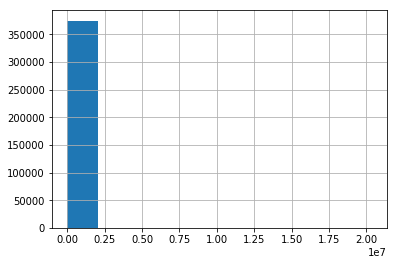

In [18]:
%matplotlib inline
kickstarter_2018.usd_pledged.hist();

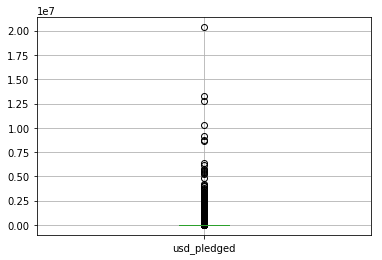

In [19]:
kickstarter_2018.boxplot(column='usd_pledged');

"There are many rules of thumb for how to define an outlier but there is no silver bullet. One rule of thumb is that any data point that is three standard deviations away from the mean of the same data point for all observations."

In [20]:
outliers = kickstarter_2018[kickstarter_2018.usd_pledged > (kickstarter_2018.usd_pledged.mean() + 
                                                            3 * kickstarter_2018.usd_pledged.std())]
outliers

ID                                               name  \
154     1000629643  ODIN: Android 'Smart' Projector to Carry in Yo...   
175     1000725978             Air Bonsai | Create your "little star"   
330     1001502333             Pimax: The World's First 8K VR Headset   
655     1003182869        RinseKit: The Revolutionary Portable Shower   
1185    1006008989                              War for the Overworld   
1583    1008109037  The Electron: Cellular dev kit with a global d...   
1720    1008826259  NORTH DRINKWARE : Mt. Hood, The Oregon Pint Glass   
3435     101767263        3Doodler: The World's First 3D Printing Pen   
3685    1019039281                  The Apocrypha Adventure Card Game   
4568    1023336156                           Journey: Wrath of Demons   
5028    1025701043  The Peachy Printer - The First $100 3D Printer...   
5209    1026598212                     Numenera: Into the Ninth World   
5328    1027144241                  Silvon: Bedding Basics Reimagined   
5521    1028259978       Keplero Luxury Wallet - Strong RFID-Blocking   
5526    1028274367                    Oculus Rift: Step Into the Game   
5810    1029803652  Barracuda: Collapsible Luggage + Tray + GPS + ...   
6525    1033325024  Vinhos Deluxe Edition: Like fine wine, age has...   
6665    1033978702             OUYA: A New Kind of Video Game Console   
6687    1034094182                          The Evolution Game System   
6827    1034696988                                  Outcast Reboot HD   
7119    1036153335  MagSphere & MagBounce Flash Diffusers - by MagMod   
7956     104017071         Rhino Slider EVO - Motorized Camera Slider   
8412    1042491304  21st CENTURY TANK GIRL: a book by Hewlett & Ma...   
8664    1043743498                           Too Many Bones: Undertow   
9008    1045500705                            Zombicide: Black Plague   
9161    1046250173  Slicks Travel System: One Backpack, Limitless ...   
9221    1046582363                                          Fate Core   
9911    1050045256  MIOPS: Smartphone Controllable High Speed Came...   
9940    1050138201              Pressy - the Almighty Android Button!   
9942    1050139758  KULT: Divinity Lost - Horror Roleplaying Game ...   
...            ...                                                ...   
371106   960928351             Helix™ - The World's Best Folding Bike   
371753   964335740            Mycestro™, The Next Generation 3D Mouse   
371911   965102512  MicroView: Chip-sized Arduino with built-in OL...   
372327   967289704  PUGZ-World's smallest wireless earbuds charged...   
372610    96886429   Legion Meter - Charge your smartphone 92% faster   
372809   969890999    Leikr: The new Danish designed GPS sports watch   
373123    97133698  The Lomography New Petzval 58 Bokeh Control Ar...   
373239   971891494                                      The Universim   
373416    97277862                           Homestuck Adventure Game   
374005   975910401             Coup Reformation - Kickstarter Edition   
374641   979218564        Mighty - Streaming Music Without Your Phone   
374714   979618750          To Be Or Not To Be: That Is The Adventure   
374778   980016370  Moment Smartwatch:  world's first wrap around ...   
375025   981149095           "Be Here Now" – The Andy Whitfield Story   
375068   981402963  Control VR- The Future of Virtual Reality, Ani...   
375307   982678058             THE AGENTS - A Double-edged Cards Game   
375428   983269801  Travail: Democratizing Fine Dining in Robbinsd...   
375580     9841415  BelayCords - Reversible USB Charging Cords iPh...   
375590   984184212   Nebia Shower - Better experience, 70% less water   
375756   985162833  Full-size reissue of the NYCTA Graphics Standa...   
376402   988467665                  Phree - Make the world your paper   
376700   990028891                      Sesame. Your key, reinvented.   
376893   991031889  McSweeney's: New Books, New Magazines, and a W...   
3

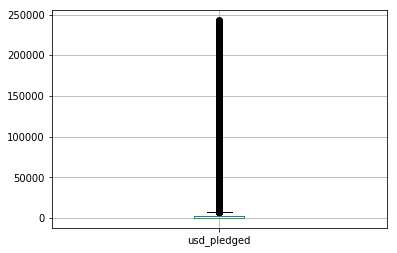

In [21]:
kickstarter_2018.drop(outliers.index).boxplot(column='usd_pledged');

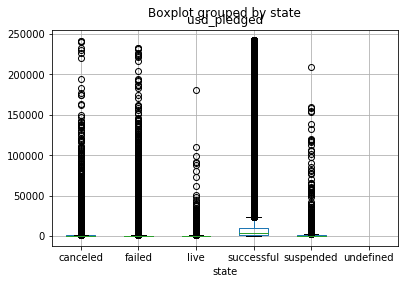

In [22]:
kickstarter_2018.drop(outliers.index).boxplot(column='usd_pledged',by='state');

Analizar outliers por categorías

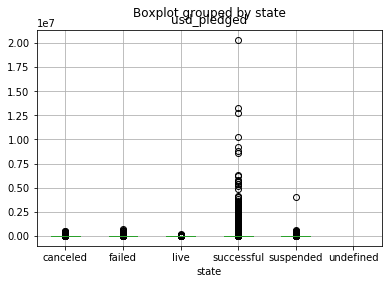

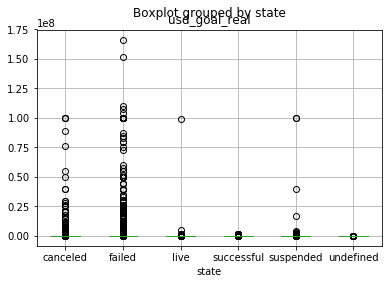

In [23]:
kickstarter_2018.boxplot(column='usd_pledged',by='state');
kickstarter_2018.boxplot(column='usd_goal_real',by='state');

#### Ejercicio 6

# TENER EN CUENTA INPLACE para no copiar datasets grandes en memoria!

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

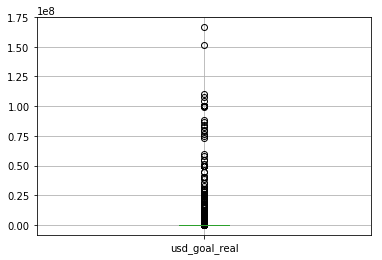

In [31]:
kickstarter_2018.boxplot(column='usd_goal_real');

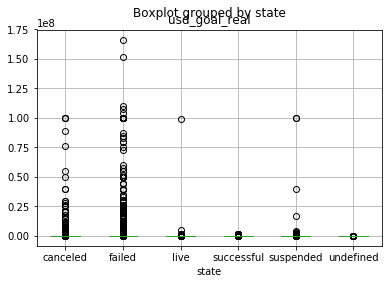

In [32]:
kickstarter_2018.boxplot(column='usd_goal_real', by='state');

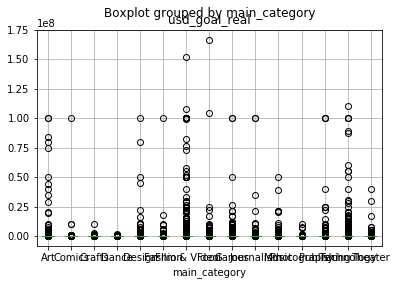

In [33]:
kickstarter_2018.boxplot(column='usd_goal_real', by='main_category');

In [27]:
outliers = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]
outliers

ID                                               name  \
1795    1009207145                                      ** GOLIATH **   
2993    1015466274                                            Genesis   
3140    1016210580            INDIRA – THE FIRST INDIAN GRAND MUSICAL   
5076    1025947904      Long island city new york art book (Canceled)   
5759    1029500715                     Harambe World's Tallest Statue   
6161    1031487313  Music app ( Pupilize) is the next big thing fo...   
9157    1046235166                                               Duel   
10449   1052555922           Cloud Based Project Analytics Dashboards   
12517   1062809925                                   Turn a Blind Eye   
13803    106947703                   Help FYFC Podcasts Buy a Harrier   
14081   1070802237             XCenter College Of Art, Music & Design   
14454   1072735957                     Intelligent Design: The Series   
15038    107576662                     Atlantis, the Aqua Data Center   
15496   1078377092                                               0XYZ   
17523   1088934319                             Mete Mano Producciones   
18348   1093191214                            Rettet das Jungle World   
20443   1103920570          Bertone cars collection, Museum in motion   
20783   1105409207                                         Games Over   
23282   1118204694             OMNI - Intelligent Construction Robots   
23469   1119122774    Help me start a fair media company, Trump Media   
25723   1130759236             Destroy only copy of new Wu-Tang Album   
31473   1160034564  Boston 50's film called-Body of Deception-Indi...   
33084   1168153740           Sage: Warrior Of The Fallen Gods (Movie)   
33658   1170831194    New Earth Power - Supplying Power to All People   
33731   1171241040                           COMPUTERS FOR CHRISTIANS   
35591   1180553835                                           Justyn's   
35786   1181512240                    The Best Kickstarter Video Ever   
36346    118443864           Hannibal Season 4 Kickstarter (Canceled)   
41039   1208863771  Key West: The Conch Republic  - A Family Film ...   
41318   1210245084         ReefAngels - Coral Reef rebuilding program   
...            ...                                                ...   
354319   875128200                                    Kirby's Kandies   
355661   881624585             The MELTIN'POT JEANS - The renaissance   
356874   887949840                     Accolade Shadow Box (Canceled)   
357751   892520897  Feature-Length Movie: Secret of the Missing Grave   
358478   896235267     Legend of the Stolen Guitar -- (Zimbabwe film)   
359450   901224552    Just say "NO" to Hillary Clinton for president.   
363500    92208526    game. a new vision from todd harris. (Canceled)   
363593   922558703                         the true Democracy machine   
365641    93305658                                YOUNG B0Y SYNDICATE   
366402   936876546                   Gouddaa Sons Of Titan (Canceled)   
367253   941328479                       The Throne : Fall of Lucifer   
367928   944541075  Hydroponic's Skyscraper(un gratte-ciel hydropo...   
368710   948476327                           Batman: Rise of the Cowl   
369470   952413748                               The Eight Ball Bible   
369688   953415668                               Currency Free System   
369777   953878107                                          POSTCARDS   
370372   957171651                                          The Board   
370751    95913151  Revive Buick City, create Flint's own electric...   
370935   960039233                         Seed: Full-Dive Technology   
371478   962949560                 "PG" Reanimated Cartoons Tha Movie   
372131   966296715        Let's film "The Royal Coiffeur"! (Canceled)   
372491   968230682  Once Upon A Time In Shaolin - For Wu Fans, For...   
373838   974997366     TRONICA EVOLUTION. Blogger. Superhero. Mother.   
3

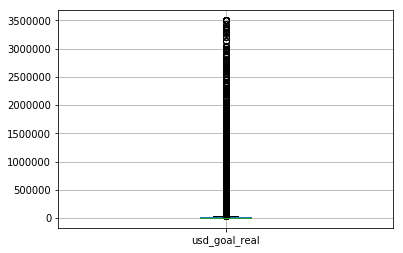

In [28]:
kickstarter_2018.drop(outliers.index).boxplot(column='usd_goal_real');

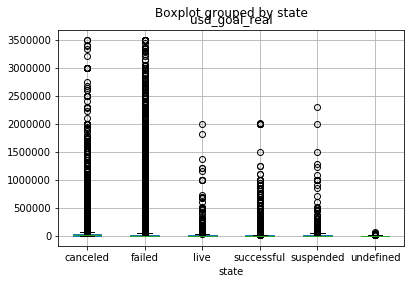

In [29]:
kickstarter_2018.drop(outliers.index).boxplot(column='usd_goal_real',by='state');

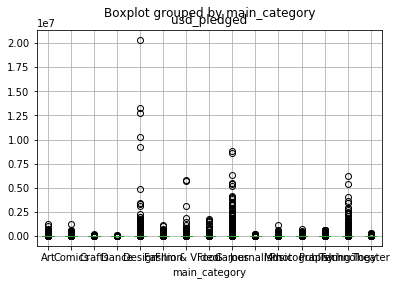

In [30]:
kickstarter_2018.drop(outliers.index).boxplot(column='usd_pledged',by='main_category');

## 2.7. Evaluar cómo comprimir los datos 
para su almacenamiento más eficiente.

En la actualidad, en las nubes el almacenamiento no suele ser problema sino la velocidad para leerlo que suele ser determinante a la hora de determinar el formato de almacenamiento.


## 2.8. Guardar el set de datos con un nombre informativo.


EL problema de la ingeniería de software